# Predicting Heart Disease

## 1. Problem Definition

To predict whether a person is having heart disease or not.

## 2. Data

The data is collected from people in Cleveland. Its available in UCI Repository and Kaggle

## 3. Features

**Data Dictionary**
1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during exercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with exercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Importing Tools

In [1]:
# EDA Libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Tests
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind,chi2_contingency

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
df = pd.read_csv('../Data/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

## Exploratory Data Analysis

In [4]:
# Data Types
df.dtypes  

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
# Missing Values
df.isna().sum()     

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

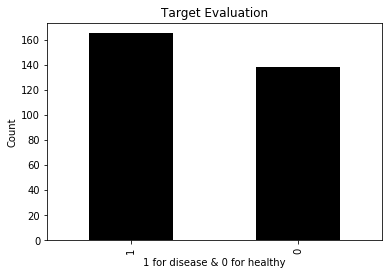

In [7]:
df['target'].value_counts().plot.bar(color=['black'])
plt.xlabel('1 for disease & 0 for healthy')
plt.ylabel('Count')
plt.title('Target Evaluation');

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Heart Disease Frequency based on Age**

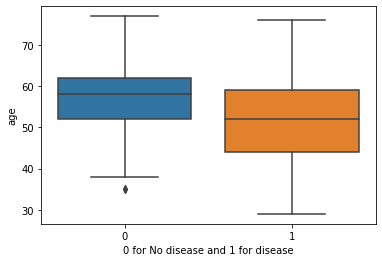

In [9]:
sns.boxplot(df['target'],df['age'])
plt.xlabel('0 for No disease and 1 for disease');

**Heart Disease Frequency based on Sex**

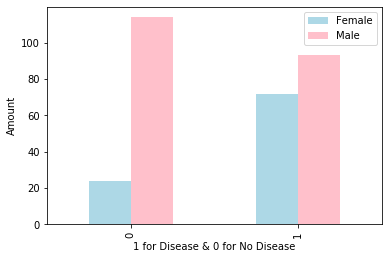

In [10]:
pd.crosstab(df['target'],df['sex']).plot(kind='bar',
                                        color=['lightblue','pink'])
plt.xlabel('1 for Disease & 0 for No Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male']);

**Heart Disease Frequency based on Chest Pain**

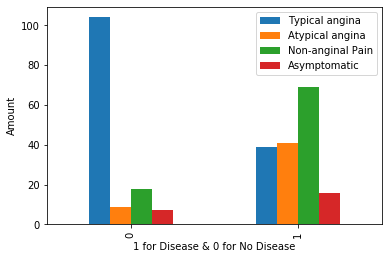

In [11]:
pd.crosstab(df['target'],df['cp']).plot(kind='bar')
                                        
plt.xlabel('1 for Disease & 0 for No Disease')
plt.ylabel('Amount');
plt.legend(['Typical angina','Atypical angina','Non-anginal Pain','Asymptomatic']);

**Heart Disease Frequency based on blood pressure**

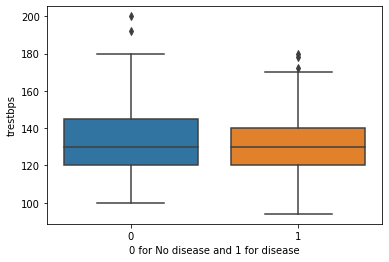

In [12]:
sns.boxplot(df['target'],df['trestbps'])
plt.xlabel('0 for No disease and 1 for disease');

**Heart Disease Frequency based on Cholestrol**

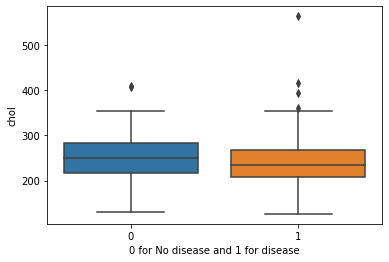

In [13]:
sns.boxplot(df['target'],df['chol'])
plt.xlabel('0 for No disease and 1 for disease');

**Heart Disease Frequency based on Blood Sugar**

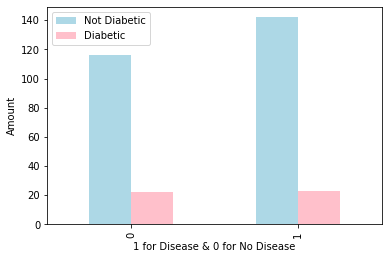

In [14]:
pd.crosstab(df['target'],df['fbs']).plot(kind='bar',
                                        color=['lightblue','pink'])
plt.xlabel('1 for Disease & 0 for No Disease')
plt.ylabel('Amount')
plt.legend(['Not Diabetic','Diabetic']);

**Age vs Max.Heart Rate**

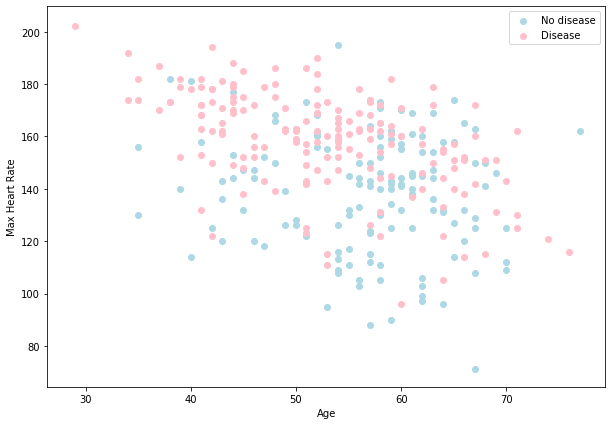

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(df['age'][df.target==0],df['thalach'][df.target==0],c='lightblue')
plt.scatter(df['age'][df.target==1],df['thalach'][df.target==1],c='pink')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['No disease','Disease']);

**Correlation**

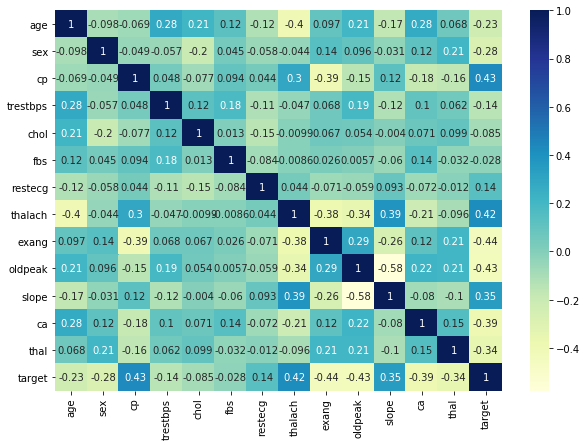

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),
            annot=True,
            cmap="YlGnBu");

## Statistical Tests

In [17]:
pd.crosstab(df['target'],df['fbs'])

fbs,0,1
target,,
0,116,22
1,142,23


In [18]:
count = np.array([142,23])
obs = np.array([258,45])
_,p_value = proportions_ztest(count,obs)
p_value

0.6254155436518225

**Fbs** is not a significant feature

In [19]:
df_tar = df.groupby('target')
df_tar0 = df_tar.get_group(0)
df_tar1 = df_tar.get_group(1)

In [20]:
_,p_value = ttest_ind(df_tar0['chol'],df_tar1['chol'])
p_value

0.13879032695600638

**Chol** is not significant

In [21]:
_,p_value = ttest_ind(df_tar0['trestbps'],df_tar1['trestbps'])
p_value

0.011546059200233312

**Blood Pressure** is significant

In [22]:
ct = pd.crosstab(df['target'],df['restecg'])
chi_value,p_value,dof,ec = chi2_contingency(ct)
p_value

0.006660598773498031

**RestECG** is significant

**Fasting blood sugar, Cholestrol** is not significant in these features

## Modelling

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# Removing insignificant features
df.drop(['fbs','chol'],axis=1,inplace=True)

In [25]:
# Splitting X and y
X = df.drop('target',axis=1)
y = df['target']

In [26]:
X.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,0,150,0,2.3,0,0,1
1,37,1,2,130,1,187,0,3.5,0,0,2
2,41,0,1,130,0,172,0,1.4,2,0,2
3,56,1,1,120,1,178,0,0.8,2,0,2
4,57,0,0,120,1,163,1,0.6,2,0,2


In [27]:
# Fixing seed level
np.random.seed(42)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

We will check four models
1. Logistic Regression
2. KNeighborsClassifier
3. DecisionTreeClassifier
4. RandomForestClassifier

In [28]:
# Models Dictionary
models = {'Logistic':LogisticRegression(),
          'K Nearest':KNeighborsClassifier(),
          'Decision Tree':DecisionTreeClassifier(),
          'Random Forest':RandomForestClassifier()}

# Results Storage
results_score = {}

In [29]:
# Model Operation
for model_name,model in models.items():
    np.random.seed(42)
    model.fit(X_train,y_train)
    results_score[model_name] = model.score(X_test,y_test)

C:\Users\Prinu Elsa Roy\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [30]:
for i in results_score.items():
    print(i)

('Logistic', 0.8852459016393442)
('K Nearest', 0.6229508196721312)
('Decision Tree', 0.8360655737704918)
('Random Forest', 0.8524590163934426)


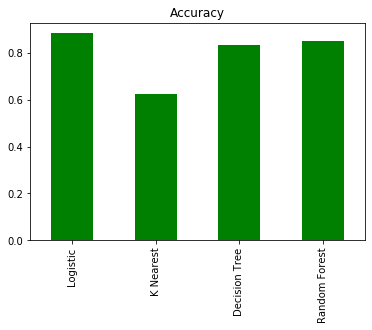

In [31]:
# Plotting
comparison = pd.DataFrame(results_score,index=['Accuracy'])
comparison.T.plot(kind='bar',color='green',title='Accuracy',legend=False);

Logistic Regression is found having highest accuracy

**Train & Test Scores**

We should also check train and test scores

In [32]:
# Train Test Scores
train_score = {}
test_score = {}

In [33]:
# Model Operation
for model_name,model in models.items():
    np.random.seed(42)
    model.fit(X_train,y_train)
    train_score[model_name] = model.score(X_train,y_train)
    test_score[model_name] = model.score(X_test,y_test)

C:\Users\Prinu Elsa Roy\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [34]:
print(f'Train Scores :{train_score}')
print(f'Test Scores :{test_score}')    

Train Scores :{'Logistic': 0.8512396694214877, 'K Nearest': 0.7603305785123967, 'Decision Tree': 1.0, 'Random Forest': 1.0}
Test Scores :{'Logistic': 0.8852459016393442, 'K Nearest': 0.6229508196721312, 'Decision Tree': 0.8360655737704918, 'Random Forest': 0.8524590163934426}


In [35]:
# Train and Test Scores
train = pd.DataFrame(train_score,index=['train'])
test = pd.DataFrame(test_score,index=['test'])

In [36]:
combined = pd.concat([train,test])
combined

,Logistic,K Nearest,Decision Tree,Random Forest
train,0.851240,0.760331,1.000000,1.000000
test,0.885246,0.622951,0.836066,0.852459


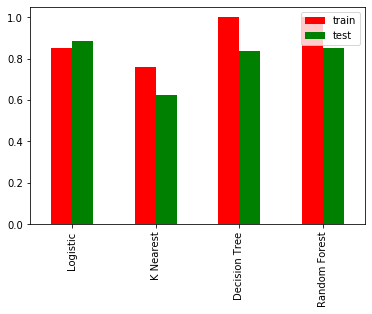

In [37]:
# Plotting train and test scores
combined.T.plot(kind='bar',color=['Red','Green']);

Best fit model is **Logistic Regression**

**Hyper Parameter Model**

In [38]:
# Logistic Regression Grid
log_reg_grid = {'C':np.logspace(-4,4,20),
                'solver':['liblinear']}

# KNN Grid
knn_grid = {'n_neighbors':np.arange(1,21)}

# Decision Tree Grid
dt_grid = {'criterion':['gini','entropy']}

# Random Forest Grid
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

**Randomized Search CV**

In [39]:
# Tuning Logistic Regression
np.random.seed(42)

# Randomized Search CV
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                   param_distributions=log_reg_grid,
                   cv=5,
                   n_iter=20,
                   verbose=2)

# Fitting model
rs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... solver=liblinear, C=0.00026366508987303583, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... so

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ......... solver=liblinear, C=0.012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.012742749857031334 ........................
[CV] ......... solver=liblinear, C=0.012742749857031334, total=   0.0s
[CV] solver=liblinear, C=0.03359818286283781 .........................
[CV] .......... solver=liblinear, C=0.03359818286283781, total=   0.0s
[CV] solver=liblinear, C=0.03359818286283781 .........................
[CV] .......... solver=liblinear, C=0.03359818286283781, total=   0.0s
[CV] solver=liblinear, C=0.03359818286283781 .........................
[CV] .......... solver=liblinear, C=0.03359818286283781, total=   0.0s
[CV] solver=liblinear, C=0.03359818286283781 .........................
[CV] .......... solver=liblinear, C=0.03359818286283781, total=   0.0s
[CV] solver=liblinear, C=0.03359818286283781 .........................
[CV] .......... solver=liblinear, C=0.03359818286283781, total=   0.0s
[CV] solver=liblinear, C=0.08858667904100823 .........................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


In [40]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [41]:
print('Randomized Search CV Logistic Regression')
print(f'Train Score :{rs_log_reg.score(X_train,y_train)*100:.2f}%')
print(f'Test Score :{rs_log_reg.score(X_test,y_test)*100:.2f}%')

Randomized Search CV Logistic Regression
Train Score :85.54%
Test Score :88.52%


In [42]:
# Tuning KNN
np.random.seed(42)

# Randomized Search CV
rs_knn = RandomizedSearchCV(KNeighborsClassifier(),
                   param_distributions=knn_grid,
                   cv=5,
                   n_iter=20,
                   verbose=2)

# Fitting model
rs_knn.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] .................................... n_neighbors=1, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] .................................... n_neighbors=2, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................... n_neighbors=4, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=5 ...................................................
[CV] .................................... n_neighbors=5, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] .................................... n_neighbors=6, total=   0.0s
[CV] n_neighbors=6 ...................................................
[CV] .

[CV] ................................... n_neighbors=18, total=   0.0s
[CV] n_neighbors=18 ..................................................
[CV] ................................... n_neighbors=18, total=   0.0s
[CV] n_neighbors=18 ..................................................
[CV] ................................... n_neighbors=18, total=   0.0s
[CV] n_neighbors=19 ..................................................
[CV] ................................... n_neighbors=19, total=   0.0s
[CV] n_neighbors=19 ..................................................
[CV] ................................... n_neighbors=19, total=   0.0s
[CV] n_neighbors=19 ..................................................
[CV] ................................... n_neighbors=19, total=   0.0s
[CV] n_neighbors=19 ..................................................
[CV] ................................... n_neighbors=19, total=   0.0s
[CV] n_neighbors=19 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


In [43]:
rs_knn.best_params_

{'n_neighbors': 16}

In [44]:
print('Randomized Search CV K Nearest Neighbors')
print(f'Train Score :{rs_knn.score(X_train,y_train)*100:.2f}%')
print(f'Test Score :{rs_knn.score(X_test,y_test)*100:.2f}%')

Randomized Search CV K Nearest Neighbors
Train Score :71.49%
Test Score :75.41%


In [45]:
# Tuning Decision Tree
np.random.seed(42)

# Randomized Search CV
rs_dt = RandomizedSearchCV(DecisionTreeClassifier(),
                   param_distributions=dt_grid,
                   cv=5,
                   n_iter=20,
                   verbose=2)

# Fitting model
rs_dt.fit(X_train,y_train);

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] criterion=gini ..................................................
[CV] ................................... criterion=gini, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ................................... criterion=gini, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ................................... criterion=gini, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ................................... criterion=gini, total=   0.0s
[CV] criterion=gini ..................................................
[CV] ................................... criterion=gini, total=   0.0s
[CV] criterion=entropy ...............................................
[CV] ................................ criterion=entropy, total=   0.0s
[CV] criterion=entropy ...............................................
[CV] ............

C:\Users\Prinu Elsa Roy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [46]:
rs_dt.best_params_

{'criterion': 'gini'}

In [47]:
print('Randomized Search CV Decision Tree')
print(f'Train Score :{rs_dt.score(X_train,y_train)*100:.2f}%')
print(f'Test Score :{rs_dt.score(X_test,y_test)*100:.2f}%')

Randomized Search CV Decision Tree
Train Score :100.00%
Test Score :83.61%


In [48]:
# Tuning Random Forest Classifier
np.random.seed(42)

# Randomized Search CV
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                   param_distributions=rf_grid,
                   cv=5,
                   n_iter=20,
                   verbose=2)

# Fitting model
rs_rf.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   1.4s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   1.4s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   1.4s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   1.4s
[CV] n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=510, min_samples_split=18, min_samples_leaf=19, max_depth=5, total=   1.4s
[CV] n_estimators=310, min_samples_split=2, min_samples_leaf=19, max_depth=5 
[CV]  n_estimators=310, min_samples_split=2, min_samples_leaf=19, max_depth=5, total=   0.9s
[CV] n_estimators=310, min_samples_split=2,

[CV]  n_estimators=310, min_samples_split=12, min_samples_leaf=9, max_depth=5, total=   0.9s
[CV] n_estimators=310, min_samples_split=12, min_samples_leaf=9, max_depth=5 
[CV]  n_estimators=310, min_samples_split=12, min_samples_leaf=9, max_depth=5, total=   0.9s
[CV] n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   2.5s
[CV] n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   2.6s
[CV] n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   2.6s
[CV] n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10 
[CV]  n_estimators=910, min_samples_split=18, min_samples_leaf=1, max_depth=10, total=   2.6s
[CV] n_estimators=910, min_samples_split=18,

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished


In [49]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [50]:
print('Randomized Search CV Random Forest')
print(f'Train Score :{rs_rf.score(X_train,y_train)*100:.2f}%')
print(f'Test Score :{rs_rf.score(X_test,y_test)*100:.2f}%')

Randomized Search CV Random Forest
Train Score :85.12%
Test Score :86.89%


Till now, the best model is Logistic Regression. So we will do Grid Search CV using Logistic Regression

**Grid Search CV**

In [51]:
# Grid Search CV
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)

# Fitting model
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 2.6...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
      

In [52]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [53]:
print('Grid Search CV Logistic Regression')
print(f'Train Score :{gs_log_reg.score(X_train,y_train)*100:.2f}%')
print(f'Test Score :{gs_log_reg.score(X_test,y_test)*100:.2f}%')

Grid Search CV Logistic Regression
Train Score :85.54%
Test Score :88.52%


Grid Search CV based logistic regression is choosen as best model

**Evaluation**

In [54]:
y_pred = gs_log_reg.predict(X_test)

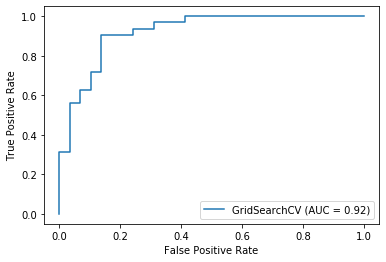

In [55]:
# ROC Curve
plot_roc_curve(gs_log_reg,X_test,y_test);

In [56]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



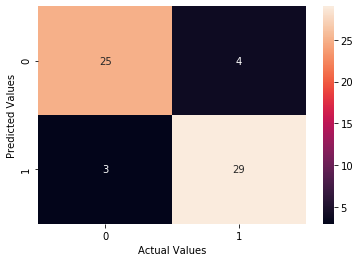

In [57]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_pred),
            annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values');

**Accuracy,Precision,Recall,F1 Score**

In [58]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [59]:
# New model with best params
clf = LogisticRegression(C=0.23357214690901212,
                      solver='liblinear')

In [60]:
# Cross validated Accuracy
cv_acc = cross_val_score(clf,
                X,
                y,
                cv=5,
                scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.86666667, 0.75      ])

In [61]:
# Cross Validated Precision
cv_pre = cross_val_score(clf,
                X,
                y,
                cv=5,
                scoring='precision')
cv_pre

array([0.775     , 0.88571429, 0.85714286, 0.85714286, 0.725     ])

In [62]:
# Cross Validated Recall
cv_rec = cross_val_score(clf,
                X,
                y,
                cv=5,
                scoring='recall')
cv_rec

array([0.93939394, 0.93939394, 0.90909091, 0.90909091, 0.87878788])

In [63]:
# Cross Validated F1
cv_f1 = cross_val_score(clf,
                X,
                y,
                cv=5,
                scoring='f1')
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.88235294, 0.79452055])

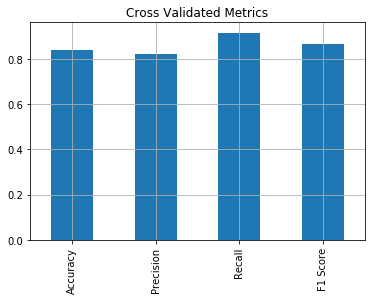

In [64]:
# Plotting Cross Validated Metrics
metrics = pd.DataFrame({'Accuracy':np.mean(cv_acc),
                        'Precision':np.mean(cv_pre),
                        'Recall':np.mean(cv_rec),
                        'F1 Score':np.mean(cv_f1)},
                         index=[0])
metrics.T.plot.bar(title='Cross Validated Metrics',
                   grid='ON',
                  legend=False);

## Feature Importance

In [65]:
# Fitting the model and finding coefficients
clf.fit(X_train,y_train)
clf.coef_

array([[ 0.00094648, -0.87496247,  0.68319287, -0.01187338,  0.34907436,
         0.02340131, -0.63801972, -0.58869517,  0.45965643, -0.64142483,
        -0.71286446]])

In [66]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [67]:
feature_imp = dict(zip(df.columns,list(clf.coef_[0])))
feature_imp

{'age': 0.0009464820065628376,
 'sex': -0.874962471635484,
 'cp': 0.6831928683869054,
 'trestbps': -0.011873381846107969,
 'restecg': 0.3490743562334302,
 'thalach': 0.023401311246017943,
 'exang': -0.6380197187621975,
 'oldpeak': -0.5886951681007988,
 'slope': 0.4596564279862898,
 'ca': -0.6414248324534161,
 'thal': -0.7128644638089837}

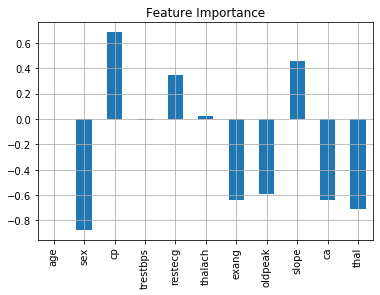

In [68]:
# Plotting Feature Importance
feature_imp_df=pd.DataFrame(feature_imp,index=[0])
feature_imp_df.T.plot.bar(title='Feature Importance',legend=False,grid='ON');

**Sex & Chest Pain are the main features that can influence heart disease**